# Prise en main et premier algorithme de descente en Python

Avant de nous lancer dans la compétition du meilleur prédicteur du cours du BitCoin, nous allons voir ensemble pas à pas comment implémenter un algorithme de descente en Python. 

Cette première partie de TP a donc pour but de comprendre comment une descente de gradient peut permettre de résoudre un problème de classification tout simple : vous vous souvenez du cours et, dans le chapitre "Lien avec le machine learning", de la partie sur les "Réseaux de Neurones et minimisation de la cross entropy" ? Et bien c'est cela que nous allons voir en Python. 

Nous allons tout d'abord nous familiariser avec un problème de régression linéaire puis généraliser en utilisant un perceptron, i.e. un réseau de neurones à une couche... exactement comme ce que nous avons vu en cours. 

Une fois ce TP bien compris, vous aurez toutes les clefs pour développer votre propre perceptron pour prédire le cours du BitCoin !

Commençons par voir l'ensemble des librairies qu'il va vous falloir importer.

In [2]:
# Les imports nécessaires pour ce TP
import numpy as np # bibliothèque calcul vectoriel, matriciel
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
import random as rd

Maintenant, nous sommes prêts pour faire notre première régression linéaire : ce sera un très bon exemple introductif, simple !

## 1 - Régression linéaire

Qu'est-ce qu'une régression linéaire ? 

Je vous donne :
- $\mathcal{P}$ est un ensemble des points
- $\forall p \in \mathcal{P}$, $p$ est le point de coordonnées $(x_p,y_p)$
- $X = \{x_p, p\in \mathcal{P}\}$ est la liste des abscisses
- $Y = \{y_p, p\in \mathcal{P}\}$ est la liste des ordonnées

et vous devez définir une fonction linéaire $f: x \mapsto a*x + b$ qui représente au mieux la distribution des points. Autrement dit, vous allez devoir apprendre les valeurs de $a$ et $b$ telles que $\forall x_p\in X, f(x_p)$ soit le plus "proche possible" de $y_p$.

Le code ci-dessous vous illustre comment générer une base $\mathcal{P}$ de points : cela servira pour la suite de l'exemple. Regardez le : vous vous apercevrez que l'on triche un peu car les points ne sont pas générés complètement aléatoirement. On les génère autour de la droite qu'il faudra devenir par la suite. C'est juste histoire d'avoir un exemple qui marche.

In [5]:
# Génération de données pour tester notre régression linéaire

nbPoints = 700 # nombre de points

# afin d'avoir des points pour lesquel on peut appliquer une régression linéaire
# nous définisson une équation de droite définis par :

# - le coefficient directeur
coefD = 3.5 # valeur arbitraire
# - l'ordonné à l'origine
ordO = 4 # valeur arbitraire

# générons la liste des abscisses
X = np.random.random(nbPoints)
# pour pouvoir visualiser correctement, nous les trions par ordre croissant
X = np.sort(X)

# générones la liste des ordonnées grâce à l'équation de la droite
Y = coefD*X + ordO
#Y = coefD*np.log(1/(X**2+1)) + ordO

# nous désirons cependant un minimum d'aléatoire autour d'une droite (comme du bruit) 
Y += np.random.random(nbPoints)

# visualisation en nuage de points (scatter)
plt.scatter(X,Y)
plt.show()

### Comment apprendre les coefficients $a$ et $b$ ?

Nous allons utiliser une descente de gradient en suivant le même principe que ce que nous avons vu en cours. Il faut pour ça commencer par définir le problème d'optimisation continue à résoudre. Les coefficients $a$ et $b$ étant appris à partir du nuage de points $\mathcal{P}$, il nous faut une mesure de l'erreur de prédiction, i.e. une mesure de l'écart entre $y_p$ et $f(x_p), \forall p\in \mathcal{P}$. Nous allons utiliser l'erreur au sens des moindres carrés :

$E(\mathcal{P}) = \frac{1}{2}\sum \limits_{p \in \mathcal{P}}(f(x_p)-y_p)^2=\frac{1}{2}\sum \limits_{p \in \mathcal{P}}(a*x_p + b - y_p)^2$.

Le problème d'optimisation est donc :

Minimiser $E(\mathcal{P})$,
sachant que 
    $a, b\in \Bbb{R}$

Nous allons mettre en place un algorithme de descente à base de gradient. On commence par positionner la droite $f$ avec des coefficients $a$ et $b$ pris au hasard.

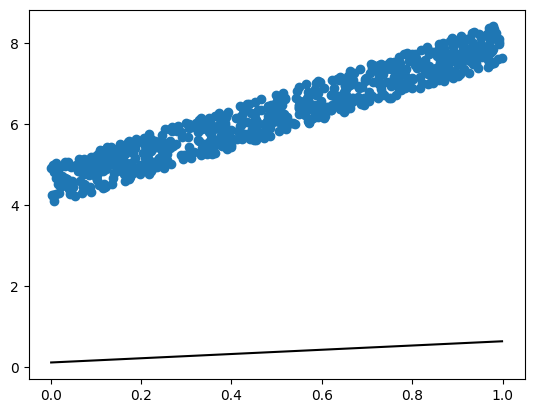

In [13]:
# définition d'une valeur initiale pour a et b
a = rd.random()
b = rd.random()

# calcul des ordonnées par rapport à l'équation a*x + b
F = a*X+b

# visualisation en nuage de points (scatter)
plt.scatter(X,Y)
# visualisation de la droite initiale
plt.plot(X,F, color='black')
plt.show()

Définissons la fonction objectif de notre problème d'optimisation :

In [14]:
# définition de la méthode pour calculer l'erreur des moindres carrés
def mean_squarred_error(F,Y):
    return 0.5*np.sum((F-Y)**2)

Pour mettre en place l'algorithme de gradient, il est nécessaire de définir le gradient associé à la fonction objectif. Allez, c'est cadeau, le voilà : 
$\nabla E(\mathcal{P}) =[\frac{\partial E}{\partial a}(\mathcal{P}), \frac{\partial E}{\partial b}(\mathcal{P})]=[\sum \limits_{p \in \mathcal{P}}x_p*(f(x_p)-y_p), \sum \limits_{p \in \mathcal{P}}(f(x_p)-y_p)]$

In [15]:
# définition de la méthode pour calculer le gradient de l'erreur des moindres carrés
def gradient_mean_squarred_error(X, F, Y):
    return np.array([np.sum(X*(F-Y)),np.sum(F-Y)])

In [16]:
# calcul de la direction de descente (on prend le gradient et on le normalise juste par sa norme)
def direction_descente(X, F, Y):
    grad = gradient_mean_squarred_error(X, F, Y)
    return -grad/np.linalg.norm(grad)

### Algorithme de gradient : code et résultats

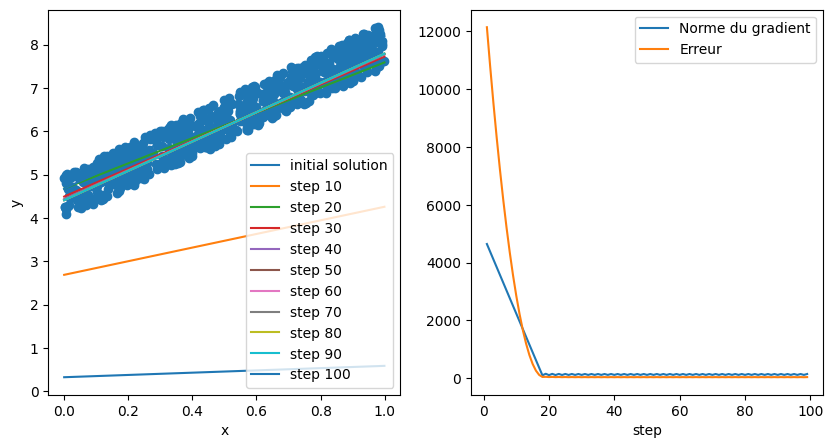

In [20]:
# critère d'arrêt sur le nombre de pas de descente
nbstep = 100
# critère d'arrêt sur la norme du gradient (stop quand |grad| < epsilon)
epsilon = 0.1

# définir un pas de descente/learning rate fixe
learning_rate = 0.3

# définition d'une valeur initiale pour a et b
a = rd.random()
b = rd.random()

# calcul des ordonnées par rapport à l'équation a*x + b
F = a*X+b

# produire deux graphes cote à cote 2 subplots
fig, ax = plt.subplots( figsize=(10, 5) , nrows=1, ncols=2)

# ax[0] est le premier graphe
# visualisation du nuage de point
ax[0].scatter(X,Y)
# visualisation de la droite initiale
ax[0].plot(X,F, label='initial solution')

# pour visualiser les evolutions en fonction du step
itersteps = []
# pour visualiser l'evolution de la norme du gradient
iterGap = []
# pour visualiser l'évolution de l'erreur
iterError = []

# premier step
step = 1

norm = epsilon + 1

while step < nbstep and norm > epsilon:
    F = a*X + b
    iterError.append(mean_squarred_error(F,Y))
    grad = gradient_mean_squarred_error(X, F,Y)
    descente = direction_descente(X, F, Y)
    norm = np.linalg.norm(grad)
    a += learning_rate*descente[0]
    b += learning_rate*descente[1]

    iterGap.append(norm)
    itersteps.append(step)
    if (step%10 == 0):
        ax[0].plot(X,F, label='step '+str(step))
    step += 1

ax[0].plot(X,F, label='step '+str(step))
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].plot(itersteps,iterGap, label='Norme du gradient')
ax[1].plot(itersteps,iterError, label='Erreur')
ax[1].set_xlabel('step')
ax[1].legend()
plt.show()


## 2 - Classification binaire

Le premier exemple (régression linéaire) étant terminé, nous allons maintenant changer et faire de la classification binaire. Rien de bien compliqué c'est extrêmement proche ce que nous avons vu en cours sur l'exemple de la société ERAM (chapitre "Liens avec le Machine Learning"). 

Alors, je vous donne :
- $\mathcal{P}$ est l'ensemble des points
- $\forall p \in \mathcal{P}$, $p$ est le point de coordonnées $(x_p,y_p)$
- $X = \{x_p, p\in \mathcal{P}\}$ est la liste des abscisses
- $Y = \{y_p, p\in \mathcal{P}\}$ est la liste des ordonnées
- $D = \{(x_p, y_p), p\in \mathcal{P}\}$ est la liste des coordonnées
- $C = \{c_p \in \{0, 1\}, p\in \mathcal{P}\}$ est la liste des classes

Autrement dit, votre base d'apprentissage $\mathcal{P}$ contient des points dont nous connaissons déjà la classe d'appartenance. 

Au niveau du code Python, on stockera dans un DataFrame Panda (data) les données d'entrée ($D, C$). Dans toute la suite des TPs on considèrera cette structure comme la structure donnée en input. De cette structure, on construira $X$, $Y$ (lorsque nécessaire) et $C$

Voici un petit exemple.

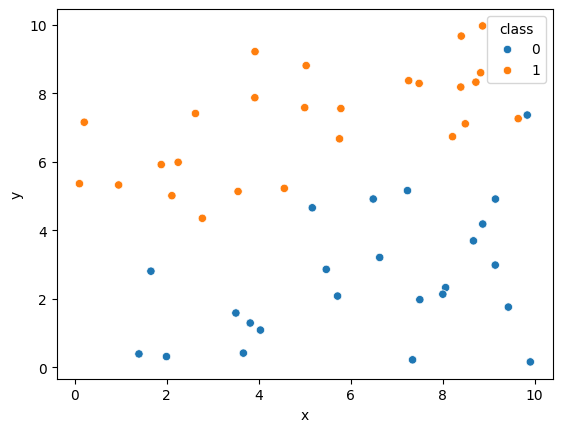

In [28]:
# Génération de données pour tester notre perceptron

nbPoints = 50

# générons la liste des abscisses
X = 10*np.random.random(nbPoints)
# générones la liste des ordonnées
Y = 10*np.random.random(nbPoints)
D=np.transpose(np.array((X,Y)))

# afin d'avoir des points séparables par une droite définissons la classe comme ceci
C = Y > 0.5*X + 2 + np.random.random(nbPoints) # un peu de bruit en plus ne fait pas de mal
# transformer le vecteur booléan en vecteur numérique
C = 1*C

# génération d'une base de donnée (utile pour les visualisations et les filtrages)
data = pd.DataFrame({"x":X, "y":Y, "class":C})
# visualisation en nuage de points
sb.scatterplot(data=data, x="x", y="y", hue="class")
plt.show()

Nous devons donc construire un classificateur binaire (notre perceptron) en partant de cette base d'apprentissage, de sorte à ce que lorsqu'un nouveau point $(x,y)$ lui sera donné, il prédise la bonne classe d'appartenance de ce point. Pour le problème de la société ERAM, c'était le même principe : nous donnions en entrée de notre classification un vecteur $V_{i,t'}$ et il nous retournait 0 ou 1 pour dire s'il fallait acheter ou pas l'action $i$. C'était également un perceptron.

### Définition du problème d'optimisation à résoudre

On va supposer qu'il existe un hyperplan séparant le nuage de points : 

$H(p) = w_1*x_p + w_2*y_p + b$.

On va alors utiliser une fonction logistique (ici la sigmoide) pour transformer les valeurs de $H(p)$ en valeurs $0$ ou $1$:

$\mathcal{S}: x \mapsto \frac{1}{1+\exp^{-\lambda x}}$.

Notre prédicteur (le classificateur) est donc : $\mathcal{S}(H(p))$.

Bien, maintenant passons au problème d'optimisation à résoudre pour apprendre sur la base d'apprentissage, les valeurs de $w_1$, $w_2$ et $b$. Il nous faut une fonction qui mesure l'erreur entre la prédiction et la valeur à prédire. Nous allons, cette fois-ci, non pas prendre la mesure des moindres carrés mais plutôt la cross-entropy comme nous l'avons vue en cours : 

$E(\mathcal{P}) = \sum \limits_{p \in \mathcal{P}}-(c_p\log_2(\mathcal{S}(H(p)))+(1-c_p)\log_2(1-\mathcal{S}(H(p))))$.

Notre problème d'optimisation est donc : 

Minimiser $E(\mathcal{P})$, sachant que $w_1, w_2, b\in \Bbb{R}$.


### Un algorithme de  gradient pour apprendre le classificateur

Commençons par déjà définir notre fonction objectif, puis notre gradient. Si vous regardez dans le cours vous constaterez que le gradient de $E(\mathcal{P})$ est donné par :

$\nabla E(\mathcal{P}) = [ -\sum \limits_{p \in \mathcal{P}} x_p(c_p-\mathcal{S}(H(p))) ;  -\sum \limits_{p \in \mathcal{P}} y_p(c_p-\mathcal{S}(H(p))) ; -\sum \limits_{p \in \mathcal{P}} (c_p-\mathcal{S}(H(p)))]$

Nous allons définir maintenant le code nécessaire pour implémenter notre perceptron : notez que le code est un peu plus générique que l'exemple que nous avons pris. Dans ce dernier, $p=(x_p,y_p)\in \Bbb{R}^2$ alors que le code est valable pour des points $p\in\Bbb{R}^n$.

Commençons par définir le code qui calcule $H(p)$.

In [21]:
# définition de la méthode pour calculer H(p)
def H(weights, constant, point):
    value=np.sum(weights*point)+constant
    return value

Définissons maintenant le code qui calcule $\mathcal{S}(x)$.

In [22]:
# définition de la fonction sigmoide (logistique) et la fonction d'arrondie
def Sigmoid(x, lamda=0.1):
        return 1/(1+np.exp(-lamda*x))


def Step_function(x):
        return 1*(x>=0)

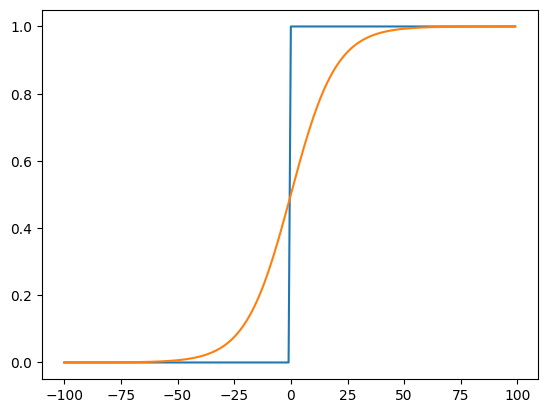

In [23]:
# visualisation de la fonction sigmoid approximant une fonction d'arrondi brutal
x = np.arange(-100,100)
plt.plot(x, Step_function(x))
plt.plot(x, Sigmoid(x,0.1))
plt.show()

TIPS: L'avantage de la sigmoïde est qu'elle est facilement dérivable et est continue par rapport à d'autres fonctions logistiques.
Cependant les valeurs de sa dérivé ont tendance à rendre les descentes de gradients difficiles car dès que l'on approche des extrêmes, le gradient tend vers $0$.
$\lim \limits_{x \rightarrow +\infty} \mathcal{S}' = \lim \limits_{x \rightarrow -\infty} \mathcal{S}' =0$

Pour éviter cela, il y a plusieurs solutions avec leurs avantages et inconvenients :
- prendre une valeur de $\lambda$ faible pour éviter une convergence trop brutale vers les extrêmes
- normaliser les données d'entrées entre $0$ et $1$

A vous de voir le cas échéant.

Passons maintenant à la définition de la fonction d'erreur $E(\mathcal{P})$, qui est notre fonction à minimiser, ainsi que du gradient.

In [25]:
# définition de la méthode pour calculer l'erreur basée sur la cross-entropy
def Loss_function(weights, constant):
    loss_value = 0
    for index in range(len(D)):
        p = D[index:index+1,:]
        c = C[index]
        loss_value -= c*np.log2(Sigmoid(H(weights, constant, p)))+(1-c)*np.log2(1-Sigmoid(H(weights, constant, p)))
    return loss_value

In [24]:
# définition du calcul de gradient
def Gradient(weights, constant):
    grad = []
    # Looping over all variables (number of variables=number of weights)
    for w in range(len(weights)):
        coord_value=0
        for index in range(len(D)):
            x=D[index:index+1,:]
            coord_value-= x[0,w]*(C[index]-Sigmoid(H(weights, constant, x)))
        grad.append(coord_value)
    coord_value=0
    # Considering the last component=constant
    for index in range(len(D)):
        x=D[index:index+1,:]
        coord_value-= (C[index]-Sigmoid(H(weights, constant, x)))
    grad.append(coord_value)
    return np.array(grad)

Entrons maintenant dans le vif du sujet : la création de notre algorithme de descente qui va apprendre les poids et la constante de la fonction $H$.
Comme vous le verrez dans le code ci-dessous, c'est un algorithme à pas d'optimisation fixe et utilisant le gradient comme direction de descente. Le critère d'arrêt est un nombre d'itérations à réaliser.

In [29]:
def Algorithme_Gradient(learning_rate = 0.5, nb_step = 1):
    
    #Initialisations pour les graphiques terminaux
    ## Produire deux graphes cote à cote 2 subplots
    fig, ax = plt.subplots(figsize=(10, 5) , nrows=1, ncols=2)
    ## Pour visualiser les evolutions en fonction du step
    itersteps = []
    ## Pour visualiser l'evolution de la norme du gradient
    iterGap = []
    ## Pour visualiser l'évolution de l'erreur
    iterError = []
    ## Pour visualiser la séparation linéaire
    line_X = np.array([min(data["x"]), max(data["x"])])
    
    #Initialisation de l'algorithme du gradient 
    ## initialiser les poids et la constante
    weights = np.random.random(np.shape(D)[1])
    constant = rd.random()
    step = 1 # numéro d'itération dans l'algorithme
    ## On dessine la droite de séparation des données avec les poids/constante initiaux
    line_Y = -(weights[0]*line_X + constant)/weights[1]
    ax[0].plot(line_X, line_Y, label='initial step')  
    
    # Exécution de l'algorithme de gradient
    while step < nb_step:
        
        # Calcule de la fonction de perte/erreur
        E = Loss_function(weights,constant)
        
        # Calcule du gradient et de sa norme
        total_grad = Gradient(weights,constant)
        norm = np.linalg.norm(total_grad)
        
        # Mise à jour des poids et de la constante
        weights-=(learning_rate*total_grad[:-1])/norm
        constant-=learning_rate*total_grad[-1]/norm

        # Stockage de valeurs à cette itération pour affichage final
        itersteps.append(step - 1)
        iterGap.append(norm)
        iterError.append(E)
            
        step += 1


    # Affichage final
    line_Y = -(weights[0]*line_X + constant)/weights[1]
    ax[0].plot(line_X, line_Y, label='step '+str(step))
    sb.scatterplot(ax = ax[0], data=data, x="x", y="y", hue="class")
    ax[0].legend()
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[1].plot(itersteps,iterGap, label='Norme du gradient')
    ax[1].plot(itersteps,iterError, label='Erreur')
    ax[1].set_xlabel('step')
    ax[1].legend()
    plt.show()
    

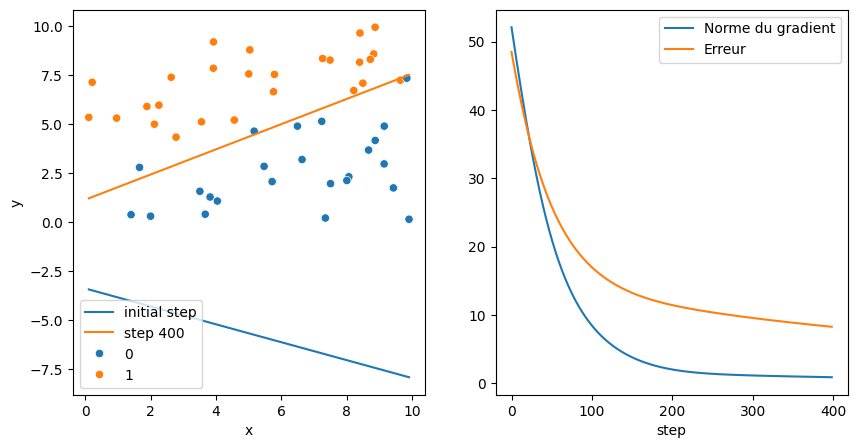

In [34]:
Algorithme_Gradient(0.09, 400)